In [ ]:
'''
отренируем навыки, полученные на практическом занятии. 
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, 
и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.
'''

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [ ]:
print(load_boston()['DESCR'])

In [ ]:
#Проверим, есть ли пропуски в датасете
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
#Посмотрим, сколько всего семплов и признаков
data.shape

In [3]:
#Сделаем функцию линейной регрессии
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [4]:
#Для поиска выбросов будем использовать boxplot

def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        pass  

In [5]:
#Сделаем ф-ю обработки категориальных переменных 

def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [6]:
#Какие колонки вообще есть
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
#Отберем колонки для первоначальной оценки модели
initial_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [7]:
initial_score = get_score(data[initial_columns], data['MEDV'])
print(f'Без доп обработки по всем признакам точность нашей модели: {initial_score.round(2)*100}%')
initial_score.round(4)

Без доп обработки по всем признакам точность нашей модели: 71.0%


0.7112

## Начнем улучшать нашу модель

<AxesSubplot:>

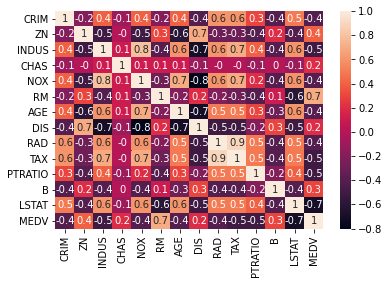

In [9]:
#Посмотрим корреляцию между параметрами 
correlation_matrix = data.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

Видим, что с парметром MEDV сильно коррелирует параметр LSTAT и RM. Значит они точно должно войти в модель

In [8]:
#В переменной возраст очень много значений. 
#Разделим на 10 и округлим вниз для того, чтобы уменьшить разброс (1-10)
#Аналогичное уменьшение размерности сделаем для PTRATIO and LSTAT
#Исходные колонки не нужны и их можно удалить
data['new_age'] = np.floor(data['AGE'] / 10)
data['new_PTRATIO'] = round(data['PTRATIO'] / 10, 1)
data.drop(columns = ['AGE'], inplace = True)
data.drop(columns = ['PTRATIO'], inplace = True)
new_data = data
new_data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,B,LSTAT,MEDV,new_age,new_PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,4.09,1,296,396.9,4.98,24.0,6.0,1.5


In [9]:
#Новые колокни нужно перевести в категориальные переменные через one_hot enconding
new_data = get_one_hot(new_data,['new_age'])
new_data = get_one_hot(new_data,['new_PTRATIO'])
new_data.drop(columns = ['new_age'], inplace = True)
new_data.drop(columns = ['new_PTRATIO'], inplace = True)
new_data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,B,...,new_PTRATIO_1.3,new_PTRATIO_1.4,new_PTRATIO_1.5,new_PTRATIO_1.6,new_PTRATIO_1.7,new_PTRATIO_1.8,new_PTRATIO_1.9,new_PTRATIO_2.0,new_PTRATIO_2.1,new_PTRATIO_2.2
0,0.00632,18.0,2.31,0,0.538,6.575,4.09,1,296,396.9,...,0,0,1,0,0,0,0,0,0,0


In [10]:
X = list(new_data.columns)
X.remove('MEDV')
y = new_data['MEDV']
new_score = get_score(new_data[X], y)
print(f'После обработки точность нашей модели составляет: {new_score.round(2)*100}%')
print(f'Она улучшилась на {round(new_score - initial_score,2)*100}% ')

После обработки точность нашей модели составляет: 73.0%
Она улучшилась на 2.0% 


## Попробуем еще улучшить нашу модель

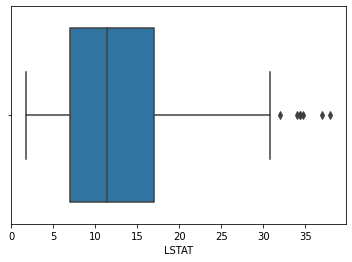

In [13]:
#выше мы наблюдали, что переменная LSTAT очень сильно коррелирует с нашей целевой переменной
#Мы видим большой разброс и что-то похожее на выбросы (шум)

get_boxplot(new_data, ['LSTAT'])


In [ ]:
#Удалять мы не будем шум, а сделаем ф-ю и уменьшим размерность

In [11]:
def transform_func(x):
    if x['LSTAT'] < 100 and x['LSTAT'] >= 50:
        return f'from 100% to 50%'
    if x['LSTAT'] < 50 and x['LSTAT'] >= 40:
        return f'from 50% to 40%'
    if x['LSTAT'] < 40 and x['LSTAT'] >= 30:
        return f'from 40% to 30%'
    if x['LSTAT'] < 30 and x['LSTAT'] >= 20:
        return f'from 30% to 20%'
    if x['LSTAT'] < 20 and x['LSTAT'] >= 15:
        return f'from 20% to 15%'
    if x['LSTAT'] < 15 and x['LSTAT'] >= 10:
        return f'from 15% to 10%'
    if x['LSTAT'] < 10 and x['LSTAT'] >= 5:
        return f'from 10% to 5%'
    if x['LSTAT'] < 5:
        return f'Less then 5%'

In [12]:
#Используем нашу ф-ю, удаляем исходный столбец и делаем категориальную переменную
new_data2 = new_data
new_data2["new_LSTAT"] = new_data2.apply(transform_func, axis =1)
new_data2.drop(columns = ['LSTAT'], inplace = True)
new_data2 = get_one_hot(new_data2, ['new_LSTAT'])
new_data2.drop(columns = ['new_LSTAT'], inplace = True)
new_data2.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,B,...,new_PTRATIO_1.9,new_PTRATIO_2.0,new_PTRATIO_2.1,new_PTRATIO_2.2,new_LSTAT_Less then 5%,new_LSTAT_from 10% to 5%,new_LSTAT_from 15% to 10%,new_LSTAT_from 20% to 15%,new_LSTAT_from 30% to 20%,new_LSTAT_from 40% to 30%
0,0.00632,18.0,2.31,0,0.538,6.575,4.09,1,296,396.9,...,0,0,0,0,1,0,0,0,0,0


In [17]:
X = list(new_data2.columns)
X.remove('MEDV')
y = new_data2['MEDV']
score_2 = get_score(new_data2[X], y)
print(f'После обработки точность нашей модели составляет: {score_2.round(2)*100}%')
print(f'Она улучшилась на {round(score_2 - initial_score,2)*100}% ')

После обработки точность нашей модели составляет: 76.0%
Она улучшилась на 5.0% 


## Будем еще улучшать

In [16]:
#Преобразуем ср кол-во комнат
new_data3 = new_data2
new_data3['rooms'] = np.floor(new_data3['RM'])
new_data3 = get_one_hot(new_data3, ['rooms'])
new_data3.drop(columns = ['RM'], inplace = True)
new_data3.drop(columns = ['rooms'], inplace = True)
new_data3.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,DIS,RAD,TAX,B,MEDV,...,new_LSTAT_from 15% to 10%,new_LSTAT_from 20% to 15%,new_LSTAT_from 30% to 20%,new_LSTAT_from 40% to 30%,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0
0,0.00632,18.0,2.31,0,0.538,4.09,1,296,396.9,24.0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
X = list(new_data3.columns)
X.remove('MEDV')
y = new_data3['MEDV']
score_3 = get_score(new_data3[X], y)
print(f'После обработки точность нашей модели составляет: {score_3.round(2)*100}%')
print(f'Она улучшилась на {round(score_3 - initial_score,2)*100}% ')

После обработки точность нашей модели составляет: 80.0%
Она улучшилась на 9.0% 


## Мы видим, что точность улучшилась на 9% от первоначального замера
## Попробуем улучшить еще

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,B,LSTAT,MEDV,new_age,new_PTRATIO
351,0.07950,60.0,1.69,0,0.411,6.579,10.7103,4,411,370.78,5.49,24.1,3.0,1.8
352,0.07244,60.0,1.69,0,0.411,5.884,10.7103,4,411,392.33,7.79,18.6,1.0,1.8
353,0.01709,90.0,2.02,0,0.410,6.728,12.1265,5,187,384.46,4.50,30.1,3.0,1.7
354,0.04301,80.0,1.91,0,0.413,5.663,10.5857,4,334,382.80,8.05,18.2,2.0,2.2
355,0.10659,80.0,1.91,0,0.413,5.936,10.5857,4,334,376.04,5.57,20.6,1.0,2.2


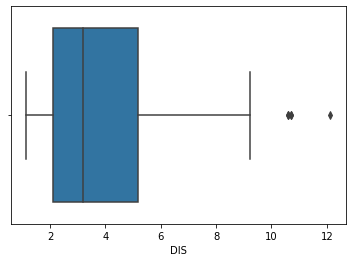

In [24]:
#Мы видим выбросы, которые вносят шум. можем их исключить
get_boxplot(data, ["DIS"])
data.loc[data['DIS'] > 10].head(40)

In [42]:
new_data4 = new_data3.loc[new_data3['DIS'] < 10]

In [43]:
X = list(new_data4.columns)
X.remove('MEDV')
y = new_data4['MEDV']
score_4 = get_score(new_data4[X], y)
print(f'После обработки точность нашей модели составляет: {score_4.round(2)*100}%')
print(f'Она улучшилась на {round(score_4 - initial_score,2)*100}% ')

После обработки точность нашей модели составляет: 84.0%
Она улучшилась на 13.0% 


## ИТОГ: Мы смогли улучшить нашу модель на 13%